# Compressão de Imagens via DCT

Aluna: Fernanda Ferreira, RA: 163676

Curso: IA898-A

Professora: Letícia Rittner

Data: 12/09/2018

## Transformada Cosseno Discreta (DCT)

#### DCT
<a href="https://www.codecogs.com/eqnedit.php?latex=C(u,v)&space;=&space;\alpha&space;(u)&space;\alpha&space;(v)&space;\sum_{x=0}^{N-1}&space;\sum_{y=0}^{N-1}f(x,y)&space;cos\left&space;[&space;\frac{(2x&plus;1)&space;\pi&space;v}{2N}&space;\right&space;]&space;cos\left&space;[&space;\frac{(2y&plus;1)&space;\pi&space;v}{2N}&space;\right&space;]" target="_blank"><img src="https://latex.codecogs.com/gif.latex?C(u,v)&space;=&space;\alpha&space;(u)&space;\alpha&space;(v)&space;\sum_{x=0}^{N-1}&space;\sum_{y=0}^{N-1}f(x,y)&space;cos\left&space;[&space;\frac{(2x&plus;1)&space;\pi&space;u}{2N}&space;\right&space;]&space;cos\left&space;[&space;\frac{(2y&plus;1)&space;\pi&space;v}{2N}&space;\right&space;]" title="F(u,v) = \alpha (u) \alpha (v) \sum_{x=0}^{N-1} \sum_{y=0}^{N-1}f(x,y) cos\left [ \frac{(2x+1) \pi v}{2N} \right ] cos\left [ \frac{(2y+1) \pi v}{2N} \right ]" /></a>

#### IDCT
<a href="https://www.codecogs.com/eqnedit.php?latex=f(x,y)&space;=&space;\sum_{u=0}^{N-1}&space;\sum_{v=0}^{N-1}&space;\alpha&space;(u)&space;\alpha&space;(v)&space;F(u,v)&space;cos\left&space;[&space;\frac{(2x&plus;1)&space;\pi&space;u}{2N}&space;\right&space;]&space;cos\left&space;[&space;\frac{(2y&plus;1)&space;\pi&space;v}{2N}&space;\right&space;]" target="_blank"><img src="https://latex.codecogs.com/gif.latex?f(x,y)&space;=&space;\sum_{u=0}^{N-1}&space;\sum_{v=0}^{N-1}&space;\alpha&space;(u)&space;\alpha&space;(v)&space;C(u,v)&space;cos\left&space;[&space;\frac{(2x&plus;1)&space;\pi&space;u}{2N}&space;\right&space;]&space;cos\left&space;[&space;\frac{(2y&plus;1)&space;\pi&space;v}{2N}&space;\right&space;]" title="f(x,y) = \sum_{u=0}^{N-1} \sum_{v=0}^{N-1} \alpha (u) \alpha (v) F(u,v) cos\left [ \frac{(2x+1) \pi u}{2N} \right ] cos\left [ \frac{(2y+1) \pi v}{2N} \right ]" /></a>
onde: 

<a href="https://www.codecogs.com/eqnedit.php?latex=\alpha&space;(u,y)&space;=&space;\left\{\begin{matrix}&space;\sqrt{\frac{1}{N}}&space;&&space;u,v&space;=&space;0\\&space;\sqrt{\frac{2}{N}}&space;&&space;u,v&space;=&space;1,2..N-1&space;\end{matrix}\right." target="_blank"><img src="https://latex.codecogs.com/gif.latex?\alpha&space;(u,y)&space;=&space;\left\{\begin{matrix}&space;\sqrt{\frac{1}{N}}&space;&&space;u,v&space;=&space;0\\&space;\sqrt{\frac{2}{N}}&space;&&space;u,v&space;=&space;1,2..N-1&space;\end{matrix}\right." title="\alpha (u,y) = \left\{\begin{matrix} \sqrt{\frac{1}{N}} & u,v = 0\\ \sqrt{\frac{2}{N}} & u,v = 1,2..N-1 \end{matrix}\right." /></a>


In [2]:
%matplotlib inline
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import urllib2
import IPython

In [73]:
def mydct(img):
    dct = fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')
    return dct

def myidct(coef):
    idct = fftpack.idct(fftpack.idct(coef.T, norm='ortho').T, norm='ortho')
    return idct

def myimagem_reconstruida(g):
    img = g.clip(0, 255)
    img = img.astype('uint8')
    img = Image.fromarray(img)
    return img

def histogram(f):

    return np.bincount(f.ravel())

In [77]:
#Teste com imagem sintética
#imagem =np.zeros((8, 8))
#imagem[2:4, 2:6]=255
#imagem[2:6, 4:6]=255
#plt.imshow(imagem)
#plt.show()

imagem = Image.open('../data/cameraman.tif')
img = np.array(imagem, dtype=np.float)
dct_size = img.shape[0]
#dct_size = 10
dct = mydct(img)
#img_reconstruida = myimagem_reconstruida(dct)

In [78]:
img_reconstruidas = []
for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    #Reconstrução da imagem
    img_r = myidct(dct_copy)
    img_reconstruida = myimagem_reconstruida(img_r)
    
    #Lista de imagens
    img_reconstruidas.append(img_reconstruida)

In [80]:
# Histograma em escala logarítmica
#plt.hist(np.log10(np.abs(dct.ravel())), bins=100, color='#348ABD', alpha=.3, histtype='stepfilled');
#plt.show()

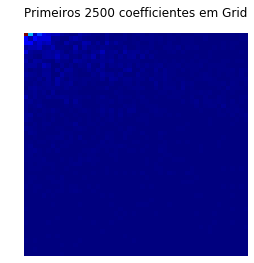

In [86]:
# Coeficientes
plt.matshow(np.abs(dct[:50, :50]))
plt.title('Primeiros 2500 coefficientes em Grid')
plt.axis('off')
plt.show()

#### Primeiras 64 imagens

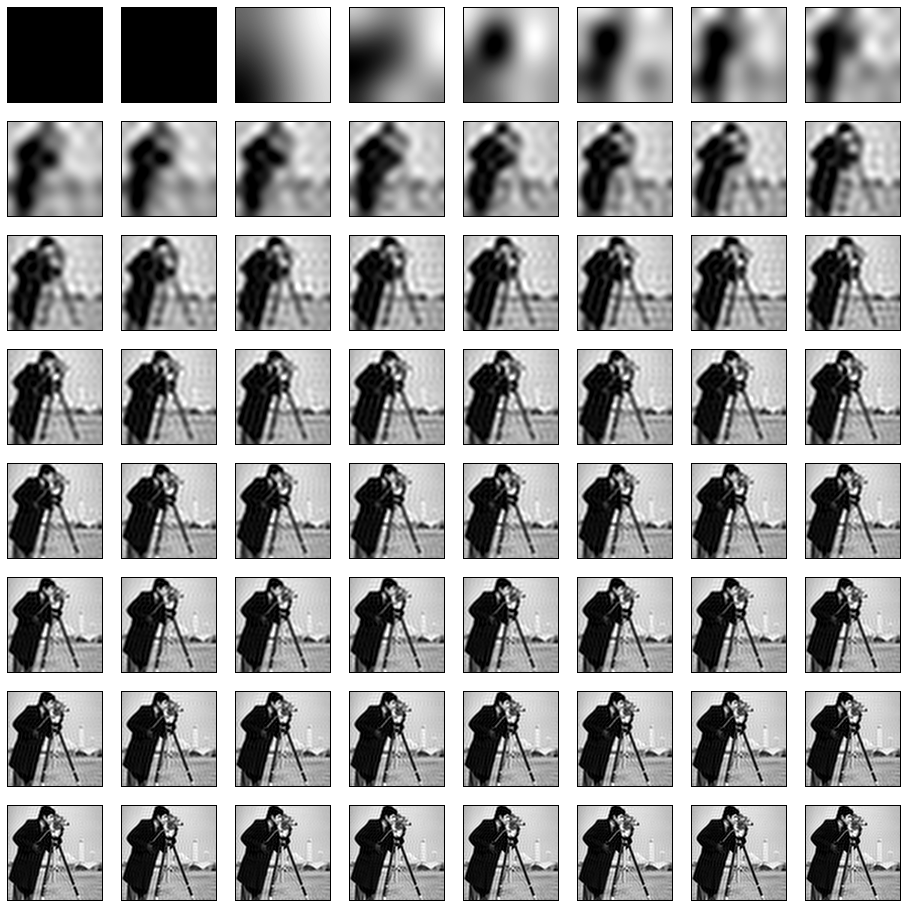

In [89]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(img_reconstruidas[ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

#### Imagens de 65 à 128 

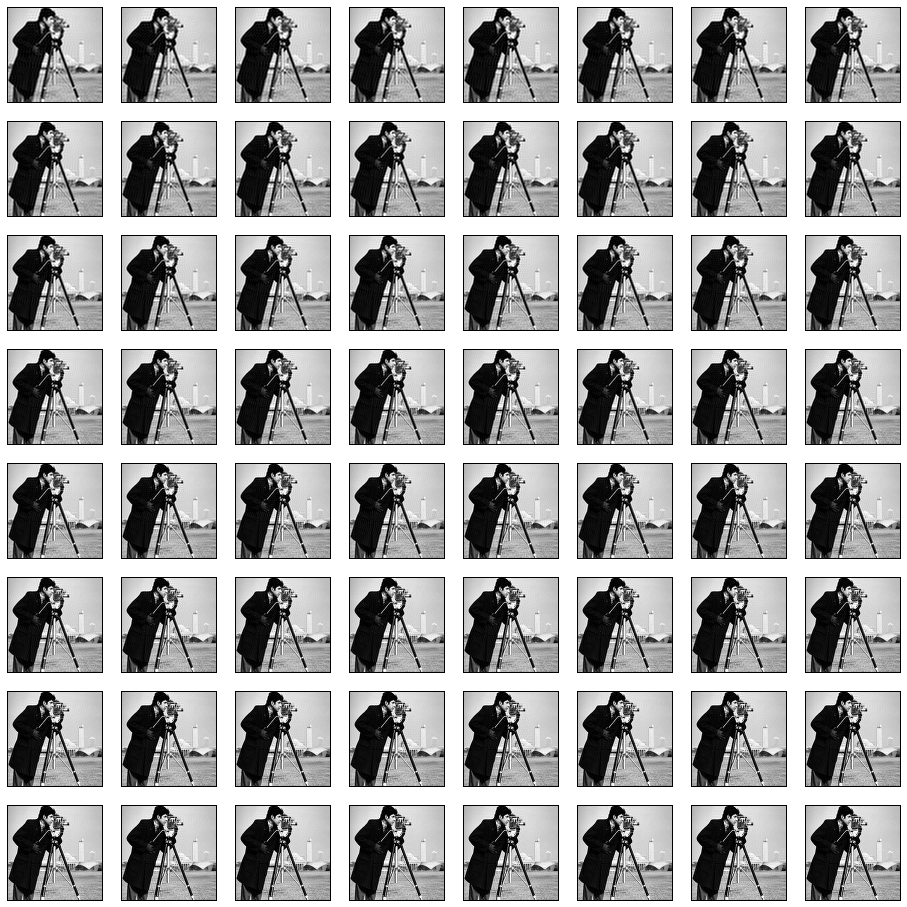

In [90]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64, 128):
    plt.subplot(8, 8, ii - 63)
    plt.imshow(img_reconstruidas[ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

#### Imagens de 129 à 192

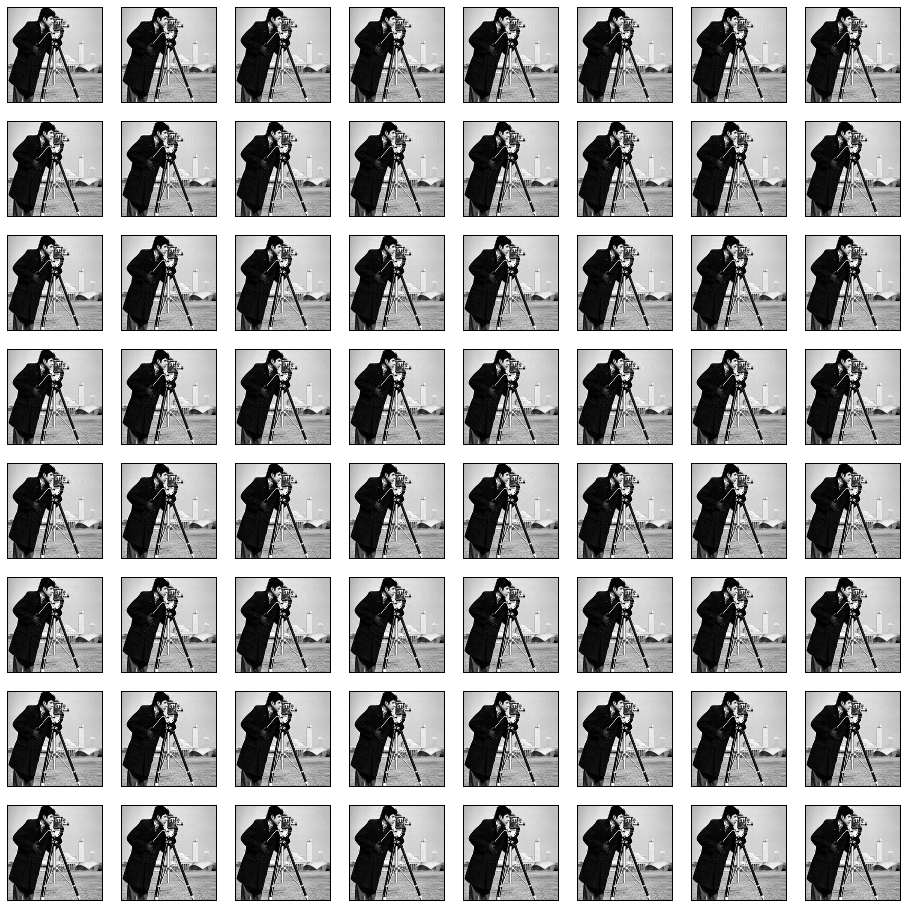

In [91]:
fig = plt.figure(figsize=(16, 16))
for ii in range(128, 192):
    plt.subplot(8, 8, ii - 127)
    plt.imshow(img_reconstruidas[ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

#### Imagens de 193 à 256

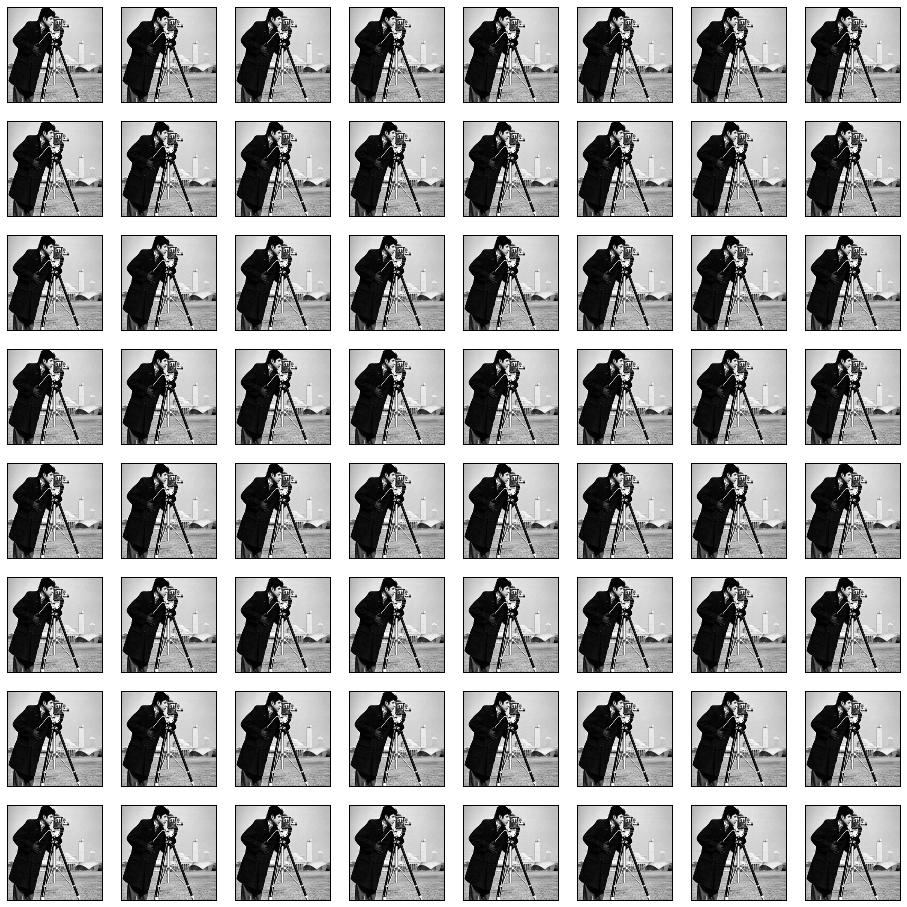

In [92]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(img_reconstruidas[-ii-1], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

## Referências

- http://bugra.github.io/work/notes/2014-07-12/discre-fourier-cosine-transform-dft-dct-image-compression/

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html

- https://www.math.cuhk.edu.hk/~lmlui/dct.pdf

- https://en.wikipedia.org/wiki/Discrete_cosine_transform

- https://asecuritysite.com/comms/dct2

- GONZALEZ, R.C., WOODS, R. “Processamento de Imagens Digitais” Edgard Blücher Ltda, 2000.